<a href="https://colab.research.google.com/github/v0rein/FinalProject/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

## Dataset
Nama Dataset : ObesityDataSet\
Tujuan       : Mencari variabel apa saja yang dapat memengaruhi seseorang dapat mengalami obesitas


In [ ]:
# import packages and libraries
# import packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
%matplotlib inline
obesity_dataset = pd.read_csv('ObesityDataSet.csv')

In [ ]:
obesity_dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Attributes related with eating habits:
Frequent consumption of high caloric food (FAVC),\
Frequency of consumption of vegetables (FCVC),\
Number of main meals (NCP),\
Consumption of food between meals (CAEC),\
Consumption of water daily (CH20),\
and Consumption of alcohol (CALC).

# Attributes related with physicial condition:
Calories consumption monitoring (SCC),\
Physical activity frequency (FAF),\
Time using technology devices (TUE),\
Transportation used (MTRANS),

# Other Attributes :
Gender,\
Age,\
Height,\
Weight.

In [ ]:
obesity_dataset.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
# Height and weight are highly correlated and they directly correlate to the BMI calc used for the target
# Remove Height and Weight
obesity_dataset = obesity_dataset.drop(columns=['Height', 'Weight'])
print(obesity_dataset.shape)

(2111, 15)


In [ ]:
# no nulls
obesity_dataset[obesity_dataset.isnull().any(axis=1)]

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [ ]:
# Convert object/text variables to category variables
columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in columns:
    obesity_dataset[col] = obesity_dataset[col].astype('category')

In [ ]:
# function to interigate data after conversion
# provides min, max, unique counts
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Pre Conversion to Integer")
    else:
        print("Post Conversion to Integer")

    for col in columns:
        print("Variable:", col, "| Count Unique:",obesity_dataset[col].nunique(),"| Min: ", obesity_dataset[col].min(), "| Max: ",obesity_dataset[col].max())

In [ ]:
# Convert float variables to integer to the nearest inter
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

# pre conversion countss
variable_counts(columns, 'pre')

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    obesity_dataset[col] = round(obesity_dataset[col]).astype('int64')

# post conversion counts
print("")
variable_counts(columns, 'post')

Pre Conversion to Integer
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

Post Conversion to Integer
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


In [ ]:
# confirm types
obesity_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   family_history_with_overweight  2111 non-null   category
 3   FAVC                            2111 non-null   category
 4   FCVC                            2111 non-null   int64   
 5   NCP                             2111 non-null   int64   
 6   CAEC                            2111 non-null   category
 7   SMOKE                           2111 non-null   category
 8   CH2O                            2111 non-null   int64   
 9   SCC                             2111 non-null   category
 10  FAF                             2111 non-null   int64   
 11  TUE                             2111 non-null   int64   
 12  CALC                

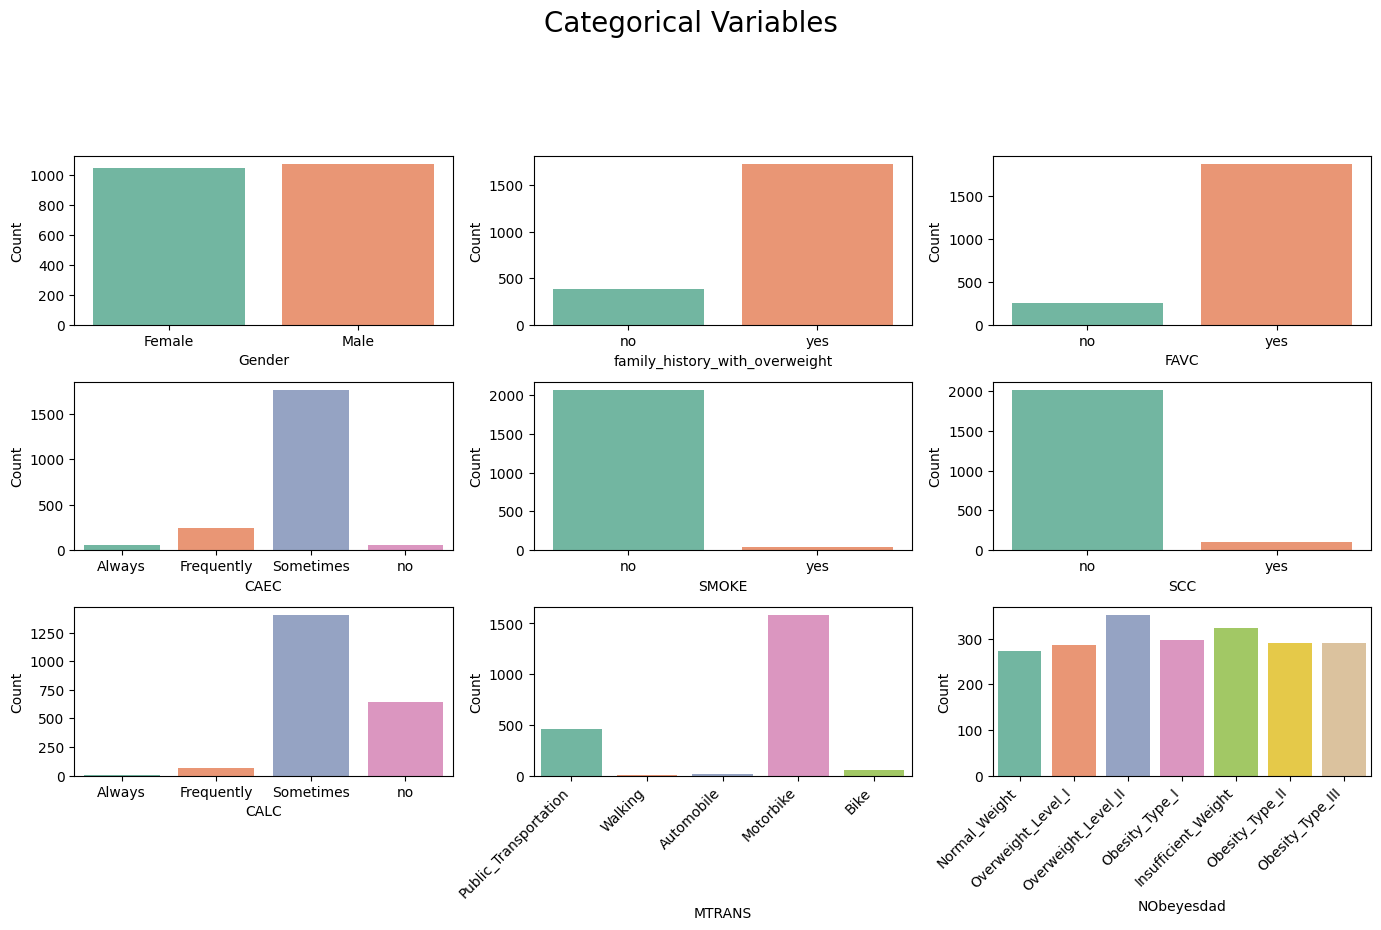

In [ ]:
# Assuming 'obesity_dataset' is your DataFrame

columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for i, col in enumerate(columns):
    subplot = ax.flatten()[i]
    sns.countplot(data=obesity_dataset, x=col, ax=subplot, palette = "Set2")
    subplot.set_ylabel("Count")

    if col in ["MTRANS", "NObeyesdad"]:
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=obesity_dataset[col].unique())

# Show figure & plots
fig.suptitle("Categorical Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.0, h_pad=1)
plt.show()


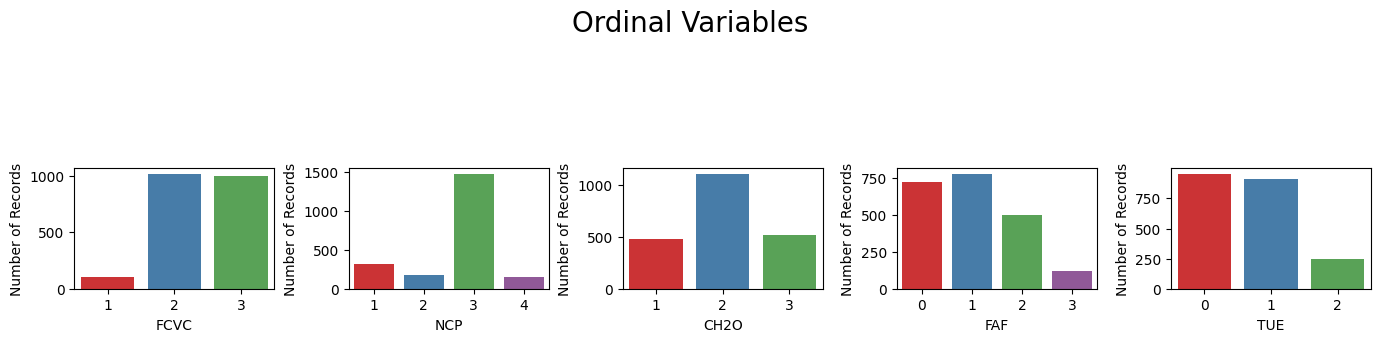

In [ ]:
# Assuming obesity_dataset is a valid DataFrame with the specified columns

# columns of interest
columns = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

fig, ax = plt.subplots(1, len(columns), figsize=(15, 4))  # Adjust subplot count based on the number of columns
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(data=obesity_dataset, x=col, ax=subplot, palette = "Set1")
    subplot.set_ylabel("Number of Records")  # Adjust y-axis label

# Show figure & plots
fig.suptitle("Ordinal Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.7, h_pad=0.5)
plt.show()


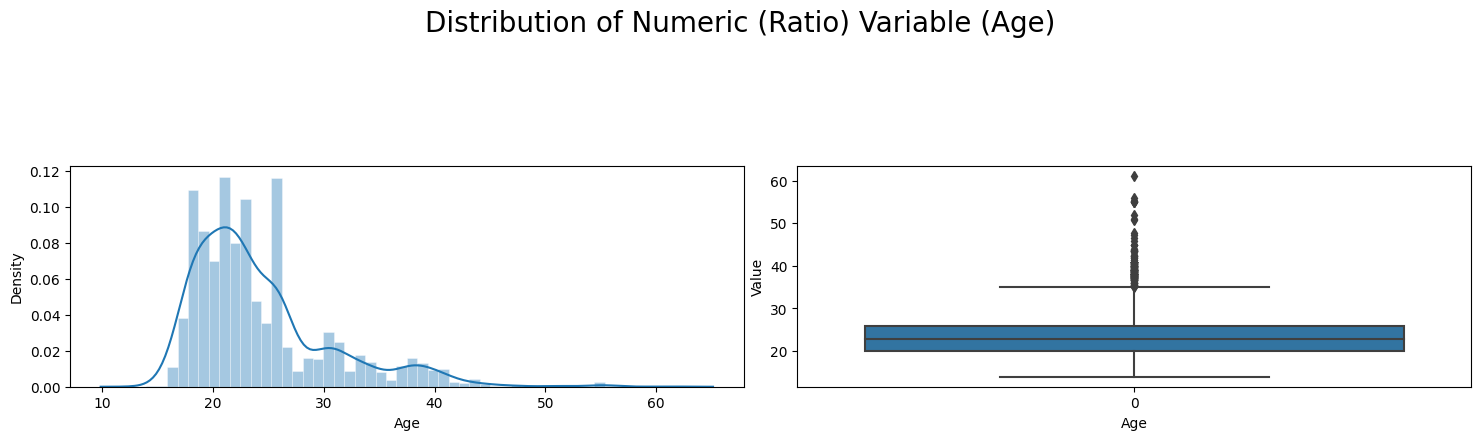

In [ ]:
# Assuming obesity_dataset is a pandas DataFrame containing your data

fig = plt.figure(figsize=(16, 5))

# distplot wannabe
ax1 = fig.add_subplot(121)
sns.histplot(
    obesity_dataset["Age"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

# boxplot
ax2 = fig.add_subplot(122)
sns.boxplot(obesity_dataset["Age"], ax=ax2)
ax2.set_xlabel("Age")
ax2.set_ylabel("Value")

# Show figure & plots
fig.suptitle("Distribution of Numeric (Ratio) Variable (Age)", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=0.1)
plt.show()

<ipython-input-14-823fb38e11d8>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(obesity_dataset.corr())
<ipython-input-14-823fb38e11d8>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(obesity_dataset.corr(),
<ipython-input-14-823fb38e11d8>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rotation=45, horizontalalignment='right', labels=obesity_dataset.NObeyesdad)


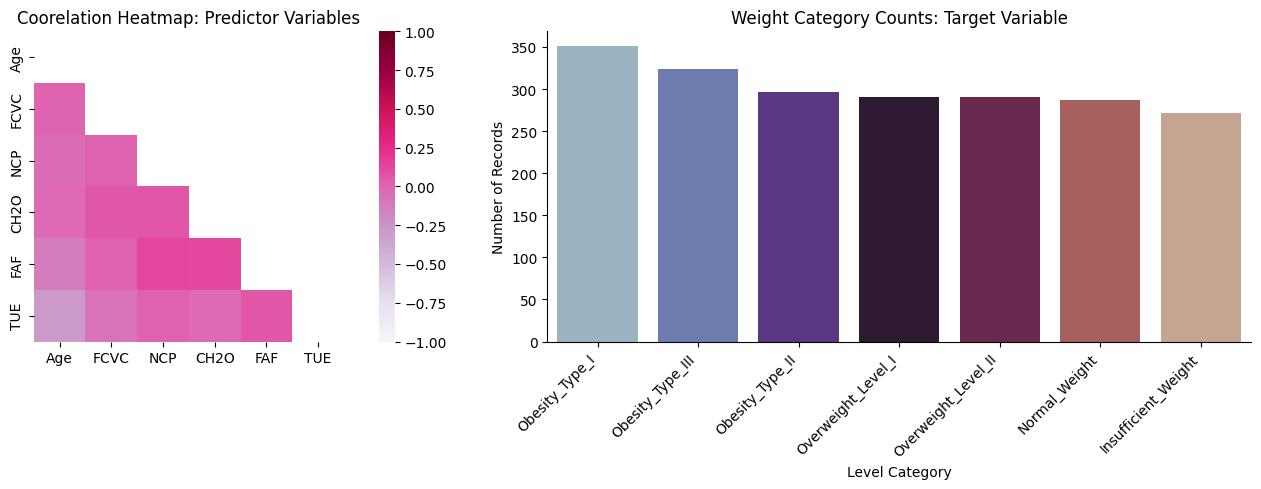

In [ ]:
# create figure
fig = plt.figure(figsize=(15, 5))

# add subplot for one row 2 graphs first postion
ax1 = fig.add_subplot(121)

# correlation data matrix
matrix = np.triu(obesity_dataset.corr())

# set title
ax1.title.set_text("Coorelation Heatmap: Predictor Variables")

#define plot
sns.heatmap(obesity_dataset.corr(),
                 mask=matrix,
                 annot = False,
                 fmt='.1g',
                 cmap="PuRd",
                 vmin=-1, vmax=1, center= 0,
                 square="True",
                 ax=ax1)

# add second subplot
ax2 = fig.add_subplot(122)

# rotate axis label
ax2.set_xticklabels(rotation=45, horizontalalignment='right', labels=obesity_dataset.NObeyesdad)

# Set title text
ax2.title.set_text("Weight Category Counts: Target Variable")

# define second plot
sns.countplot(x="NObeyesdad",
                 palette="twilight",
                 order=obesity_dataset.NObeyesdad.value_counts().index,
                 ax = ax2,
                 data=obesity_dataset)

# labels for x and y
ax2.xaxis.label.set_text("Level Category")
ax2.yaxis.label.set_text("Number of Records")

# turn off top and right frame lines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# show figure & plots
plt.tight_layout()
plt.show()

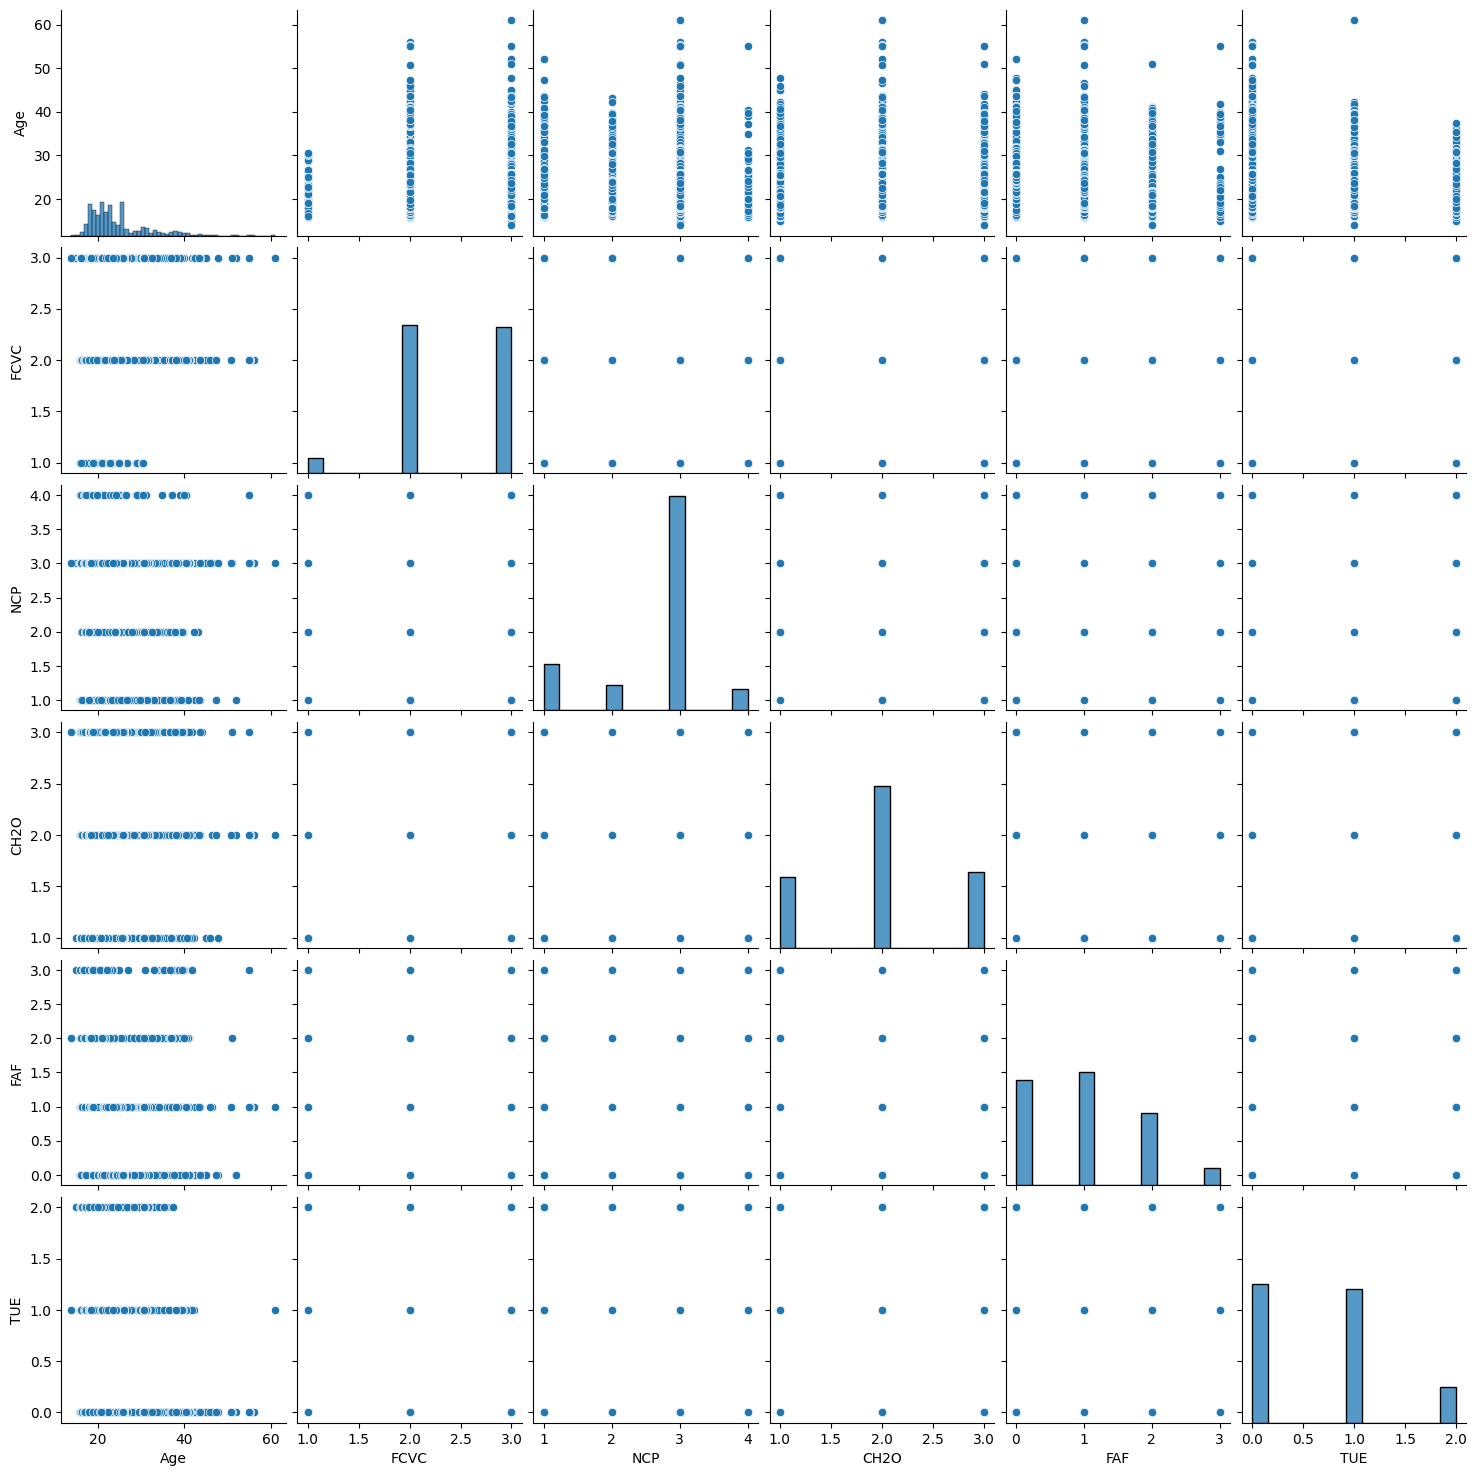

In [ ]:
sns.pairplot(obesity_dataset)